# MLP
Cell line 00 A549

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was no learn fail during CV.

MCC mean 0.4172

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 18:07:05.583074


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=0]   
print('Exclusions',EXCLUSIONS)

Exclusions [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 18:07:09.450080
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1630
Num RCI: 1630
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1630 sequences.

Training # 1 1
2023-04-29 18:07:15.538812
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-2.105863623919438, 0.3684779277094723]
Variances [1.32098869 1.13953323]
Priors [0.36160559 0.63839441]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 860:431 66.62%
Computed class weights: {0: 1.4976798143851509, 1: 0.7505813953488372}
Valid 1:0 222:117 65.49%
FIT


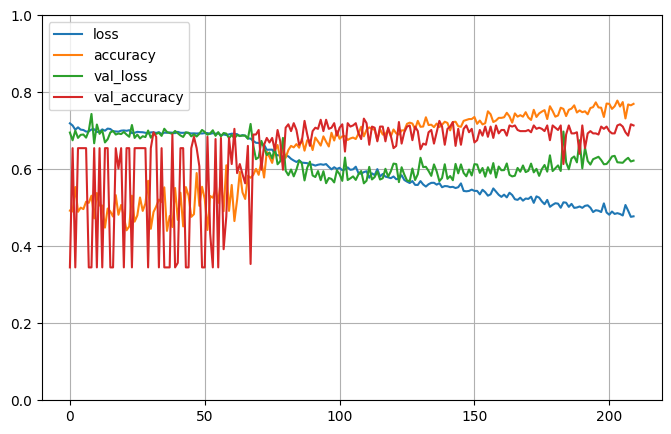


Testing # 1 1
2023-04-29 18:08:06.989533
PREDICT
Test 1:0 222:117 65.49%
Predict 1:0 245:94 72.27%
Test sizes (339, 1025) (339,)
Distrib of scores: 0.61523086 mean 0.19351678 std
Range of scores: 0.14955494 to 0.9332003
Score threshold 0.5
Confusion matrix
 [[ 60  57]
 [ 34 188]]
Normalized matrix
 [[0.17699115 0.16814159]
 [0.10029499 0.55457227]]
Extreme scores correct, pos:neg 140 33
Extreme scores incorrect pos:neg 34 11


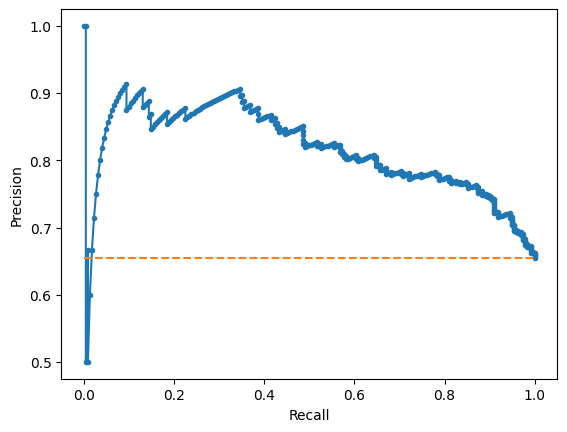

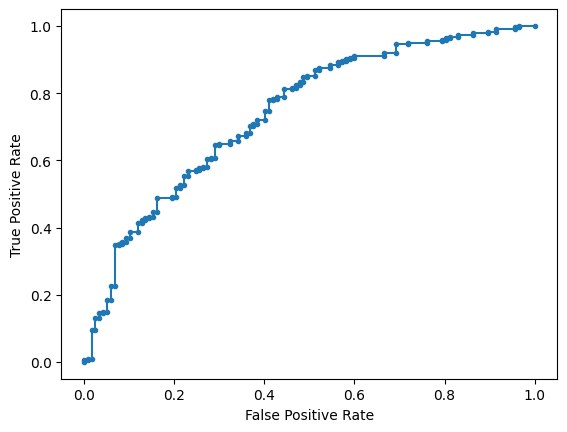

Accuracy: 73.16% Precision: 76.73% Recall: 84.68%
F1: 80.51% MCC: 0.3820
AUPRC: 81.55% AUROC: 74.00%
 accuracy [73.15634218289085]
 precision [76.73469387755102]
 recall [84.68468468468468]
 F1 [80.51391862955032]
 MCC [0.3819649174686511]
 AUPRC [81.54940456551205]
 AUROC [74.000924000924]

Training # 1 2
2023-04-29 18:08:07.979019
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [0.36783299269219893, -2.0915342663050343]
Variances [1.19886702 1.349206  ]
Priors [0.6260464 0.3739536]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 840:450 65.12%
Computed class weights: {0: 1.4333333333333333, 1: 0.7678571428571429}
Valid 1:0 237:103 69.71%
FIT


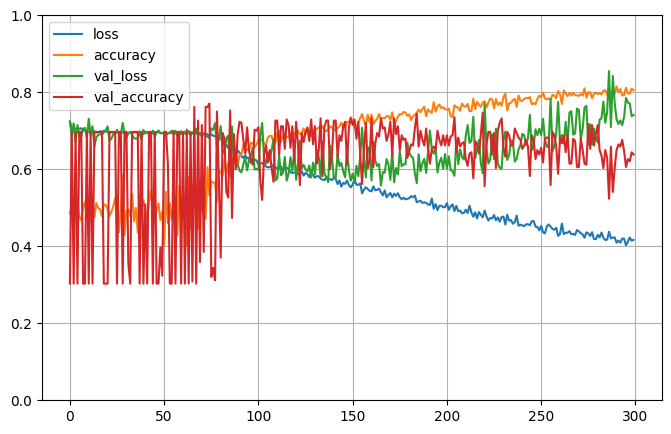


Testing # 1 2
2023-04-29 18:09:20.505715
PREDICT
Test 1:0 237:103 69.71%
Predict 1:0 210:130 61.76%
Test sizes (340, 1025) (340,)
Distrib of scores: 0.5781704 mean 0.3023993 std
Range of scores: 0.0074850046 to 0.99659026
Score threshold 0.5
Confusion matrix
 [[ 55  48]
 [ 75 162]]
Normalized matrix
 [[0.16176471 0.14117647]
 [0.22058824 0.47647059]]
Extreme scores correct, pos:neg 124 46
Extreme scores incorrect pos:neg 33 44


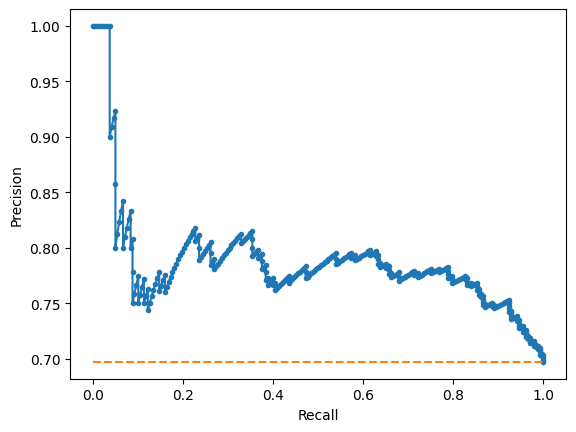

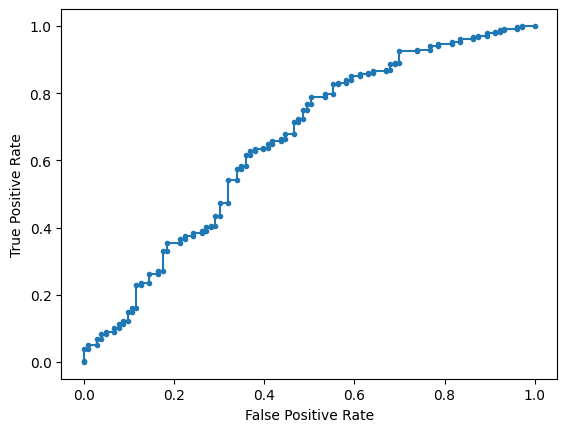

Accuracy: 63.82% Precision: 77.14% Recall: 68.35%
F1: 72.48% MCC: 0.2057
AUPRC: 78.72% AUROC: 65.43%
 accuracy [63.8235294117647]
 precision [77.14285714285715]
 recall [68.35443037974683]
 F1 [72.48322147651007]
 MCC [0.2056934261984606]
 AUPRC [78.71619373804629]
 AUROC [65.42951947892342]

Training # 1 3
2023-04-29 18:09:21.104663
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-2.109622289362356, 0.4031662083656716]
Variances [1.44857767 1.20229215]
Priors [0.36164896 0.63835104]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 877:429 67.15%
Computed class weights: {0: 1.5221445221445222, 1: 0.7445838084378563}
Valid 1:0 205:119 63.27%
FIT


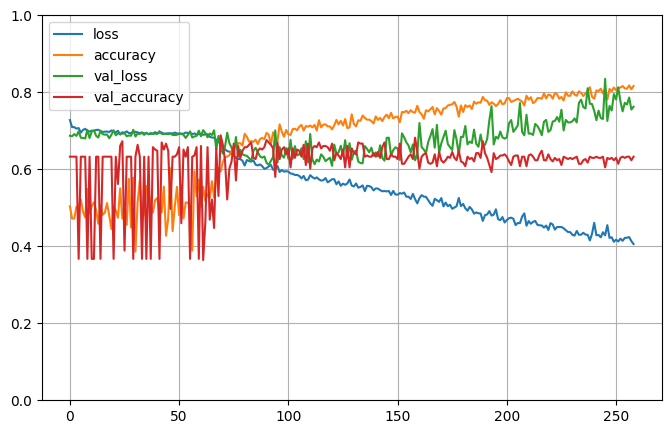


Testing # 1 3
2023-04-29 18:10:25.208718
PREDICT
Test 1:0 205:119 63.27%
Predict 1:0 240:84 74.07%
Test sizes (324, 1025) (324,)
Distrib of scores: 0.6415149 mean 0.22849329 std
Range of scores: 0.033600576 to 0.96234834
Score threshold 0.5
Confusion matrix
 [[ 50  69]
 [ 34 171]]
Normalized matrix
 [[0.15432099 0.21296296]
 [0.10493827 0.52777778]]
Extreme scores correct, pos:neg 139 31
Extreme scores incorrect pos:neg 52 14


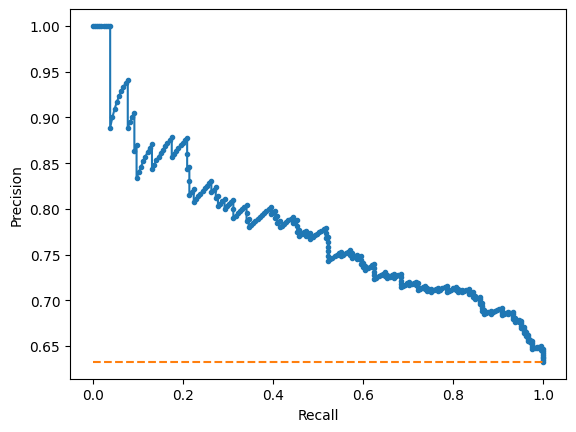

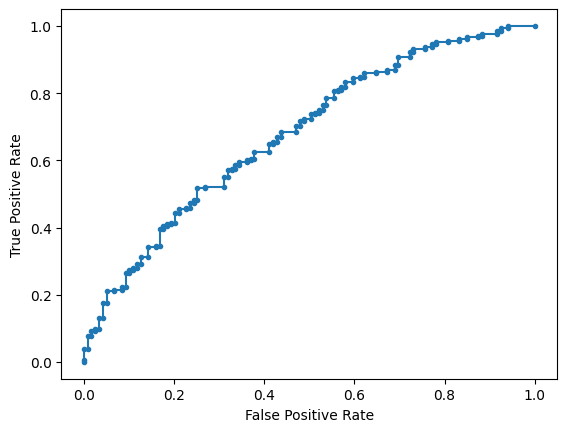

Accuracy: 68.21% Precision: 71.25% Recall: 83.41%
F1: 76.85% MCC: 0.2798
AUPRC: 77.68% AUROC: 67.95%
 accuracy [68.20987654320987]
 precision [71.25]
 recall [83.41463414634146]
 F1 [76.85393258426967]
 MCC [0.2797538770454434]
 AUPRC [77.6763568467189]
 AUROC [67.95244927239189]

Training # 1 4
2023-04-29 18:10:26.046250
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [0.39236339429050837, -2.197964087376811]
Variances [1.21178041 1.33331871]
Priors [0.64234766 0.35765234]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 888:446 66.57%
Computed class weights: {0: 1.4955156950672646, 1: 0.7511261261261262}
Valid 1:0 202:94 68.24%
FIT


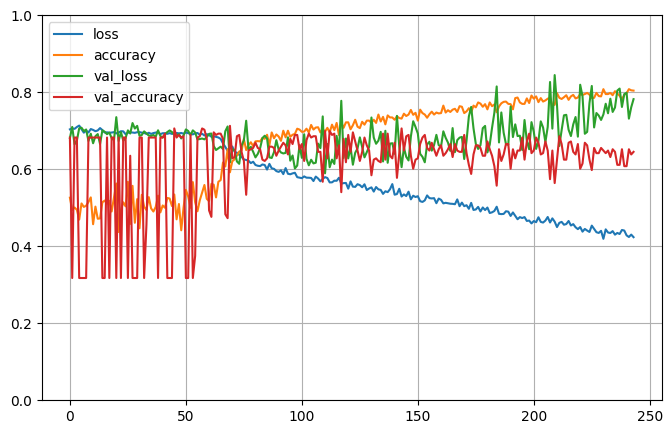


Testing # 1 4
2023-04-29 18:11:52.632656
PREDICT
Test 1:0 202:94 68.24%
Predict 1:0 207:89 69.93%
Test sizes (296, 1025) (296,)
Distrib of scores: 0.61475736 mean 0.23144567 std
Range of scores: 0.06810909 to 0.96030164
Score threshold 0.5
Confusion matrix
 [[ 48  46]
 [ 41 161]]
Normalized matrix
 [[0.16216216 0.15540541]
 [0.13851351 0.54391892]]
Extreme scores correct, pos:neg 125 32
Extreme scores incorrect pos:neg 32 21


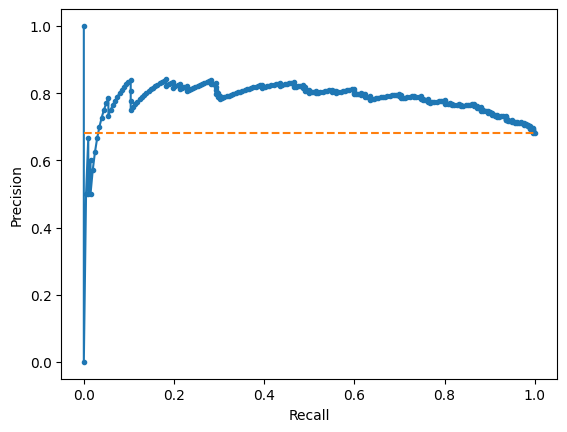

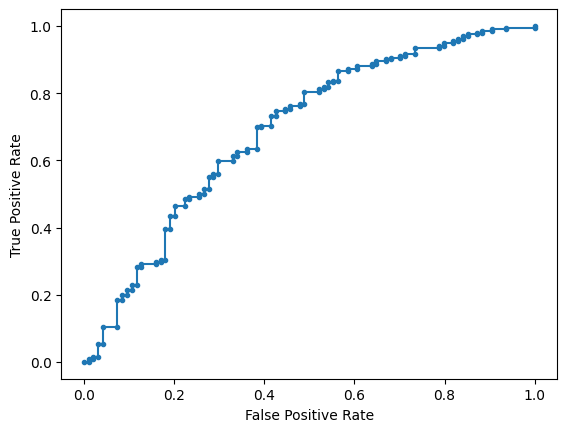

Accuracy: 70.61% Precision: 77.78% Recall: 79.70%
F1: 78.73% MCC: 0.3124
AUPRC: 78.12% AUROC: 68.96%
 accuracy [70.6081081081081]
 precision [77.77777777777779]
 recall [79.70297029702971]
 F1 [78.72860635696823]
 MCC [0.31235018324201963]
 AUPRC [78.11864818022431]
 AUROC [68.96460922688014]

Training # 1 5
2023-04-29 18:11:53.203821
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-2.0613433597723088, 0.3797433747119279]
Variances [1.40245621 1.20568796]
Priors [0.37116347 0.62883653]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 858:441 66.05%
Computed class weights: {0: 1.4727891156462585, 1: 0.756993006993007}
Valid 1:0 217:114 65.56%
FIT


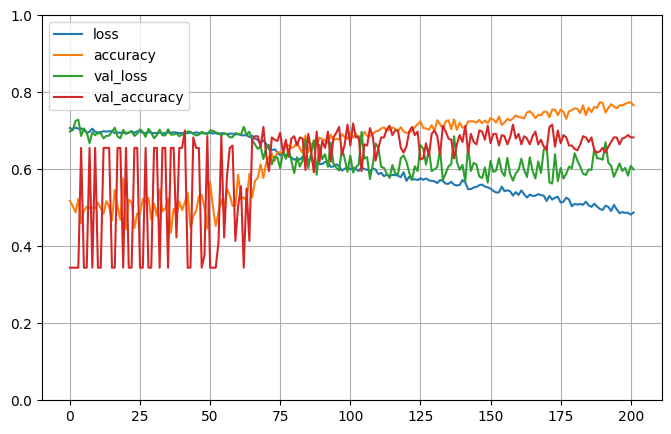


Testing # 1 5
2023-04-29 18:12:40.768537
PREDICT
Test 1:0 217:114 65.56%
Predict 1:0 226:105 68.28%
Test sizes (331, 1025) (331,)
Distrib of scores: 0.5617612 mean 0.18687293 std
Range of scores: 0.089368924 to 0.86144245
Score threshold 0.5
Confusion matrix
 [[ 63  51]
 [ 42 175]]
Normalized matrix
 [[0.19033233 0.15407855]
 [0.12688822 0.52870091]]
Extreme scores correct, pos:neg 106 35
Extreme scores incorrect pos:neg 23 20


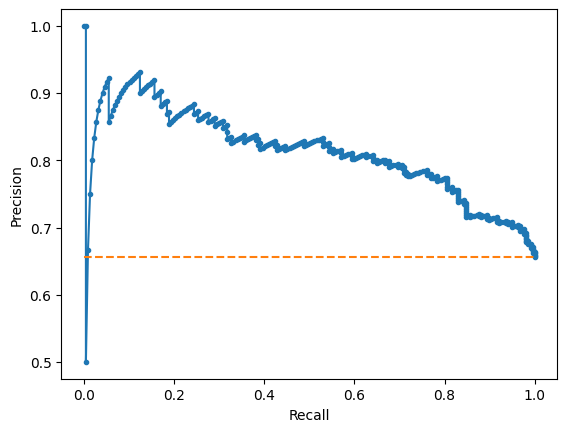

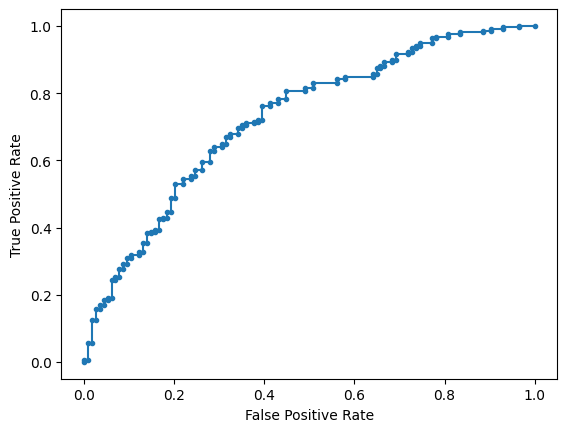

Accuracy: 71.90% Precision: 77.43% Recall: 80.65%
F1: 79.01% MCC: 0.3666
AUPRC: 81.19% AUROC: 72.45%
 accuracy [71.90332326283988]
 precision [77.43362831858407]
 recall [80.64516129032258]
 F1 [79.00677200902935]
 MCC [0.3666304234400899]
 AUPRC [81.19489998955896]
 AUROC [72.44724715013339]

Training # 2 1
2023-04-29 18:12:41.351750
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-2.0766618078680845, 0.3913764365933173]
Variances [1.35479934 1.18868102]
Priors [0.36994496 0.63005504]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 866:449 65.86%
Computed class weights: {0: 1.4643652561247216, 1: 0.7592378752886836}
Valid 1:0 208:107 66.03%
FIT


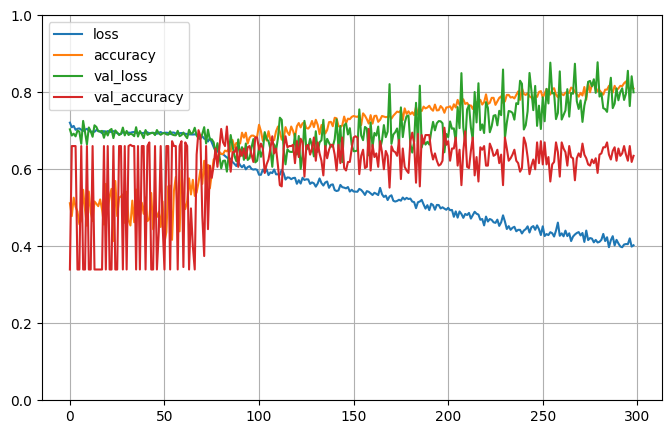


Testing # 2 1
2023-04-29 18:13:55.825963
PREDICT
Test 1:0 208:107 66.03%
Predict 1:0 218:97 69.21%
Test sizes (315, 1025) (315,)
Distrib of scores: 0.6179813 mean 0.24814579 std
Range of scores: 0.044796653 to 0.9670974
Score threshold 0.5
Confusion matrix
 [[ 56  51]
 [ 41 167]]
Normalized matrix
 [[0.17777778 0.16190476]
 [0.13015873 0.53015873]]
Extreme scores correct, pos:neg 131 34
Extreme scores incorrect pos:neg 38 25


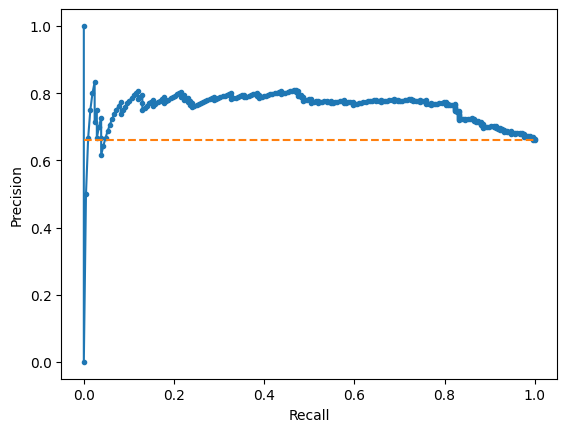

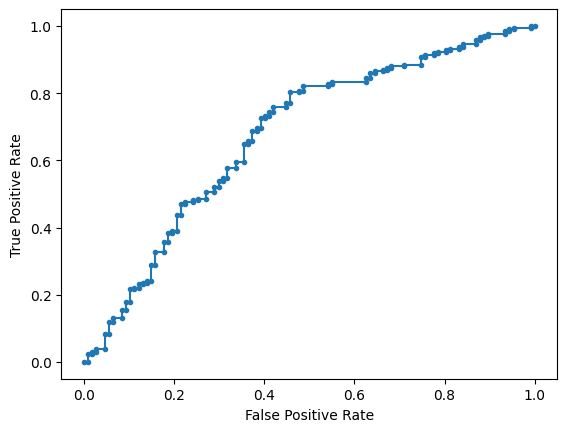

Accuracy: 70.79% Precision: 76.61% Recall: 80.29%
F1: 78.40% MCC: 0.3347
AUPRC: 75.83% AUROC: 67.64%
 accuracy [70.7936507936508]
 precision [76.60550458715596]
 recall [80.28846153846155]
 F1 [78.40375586854461]
 MCC [0.3347023537583315]
 AUPRC [75.82594102004909]
 AUROC [67.63569374550684]

Training # 2 2
2023-04-29 18:13:56.688683
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [0.37523766243373974, -2.105997624754041]
Variances [1.17457024 1.3660453 ]
Priors [0.63620735 0.36379265]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 876:443 66.41%
Computed class weights: {0: 1.4887133182844243, 1: 0.7528538812785388}
Valid 1:0 206:105 66.24%
FIT


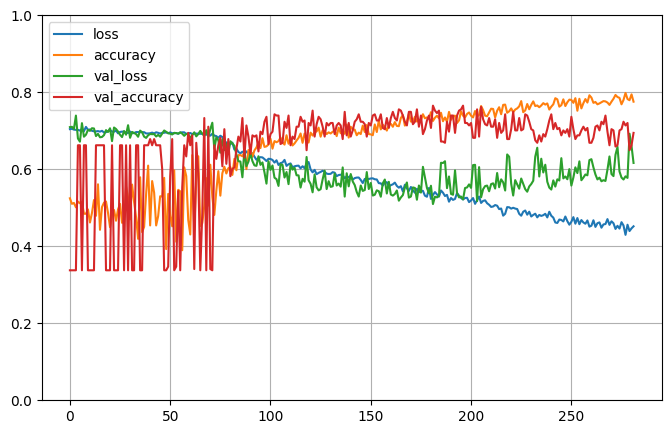


Testing # 2 2
2023-04-29 18:15:02.815259
PREDICT
Test 1:0 206:105 66.24%
Predict 1:0 235:76 75.56%
Test sizes (311, 1025) (311,)
Distrib of scores: 0.6559483 mean 0.23145804 std
Range of scores: 0.03260099 to 0.96935123
Score threshold 0.5
Confusion matrix
 [[ 54  51]
 [ 22 184]]
Normalized matrix
 [[0.17363344 0.16398714]
 [0.07073955 0.59163987]]
Extreme scores correct, pos:neg 158 35
Extreme scores incorrect pos:neg 34 10


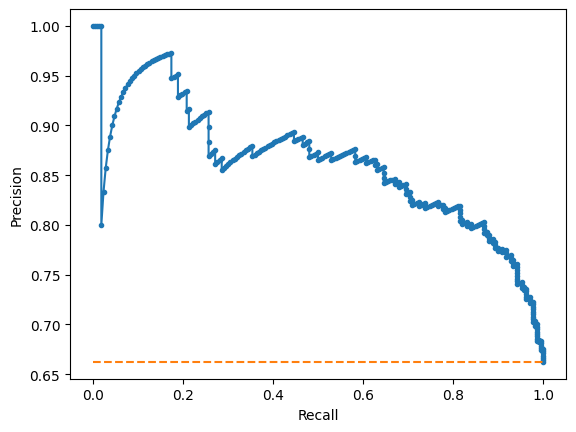

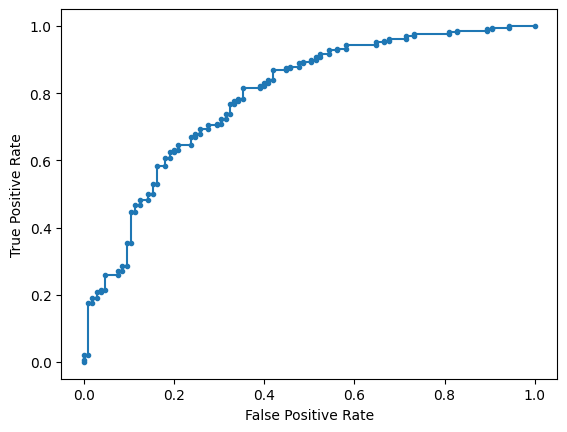

Accuracy: 76.53% Precision: 78.30% Recall: 89.32%
F1: 83.45% MCC: 0.4484
AUPRC: 86.11% AUROC: 78.95%
 accuracy [76.52733118971061]
 precision [78.29787234042553]
 recall [89.32038834951457]
 F1 [83.4467120181406]
 MCC [0.4484397060072627]
 AUPRC [86.11114020528645]
 AUROC [78.95053166897826]

Training # 2 3
2023-04-29 18:15:03.758180
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [0.36092662948346355, -2.112151779319659]
Variances [1.14599482 1.29889027]
Priors [0.62879146 0.37120854]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 845:441 65.71%
Computed class weights: {0: 1.4580498866213152, 1: 0.7609467455621302}
Valid 1:0 234:110 68.02%
FIT


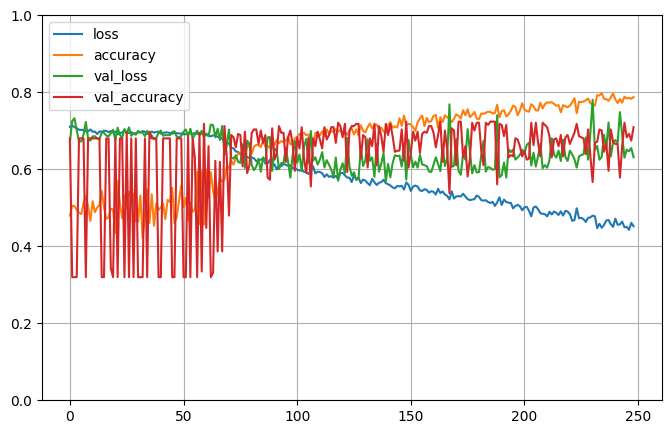


Testing # 2 3
2023-04-29 18:16:30.488304
PREDICT
Test 1:0 234:110 68.02%
Predict 1:0 257:87 74.71%
Test sizes (344, 1025) (344,)
Distrib of scores: 0.62860596 mean 0.20433496 std
Range of scores: 0.09560767 to 0.9525735
Score threshold 0.5
Confusion matrix
 [[ 51  59]
 [ 36 198]]
Normalized matrix
 [[0.14825581 0.17151163]
 [0.10465116 0.5755814 ]]
Extreme scores correct, pos:neg 145 27
Extreme scores incorrect pos:neg 34 17


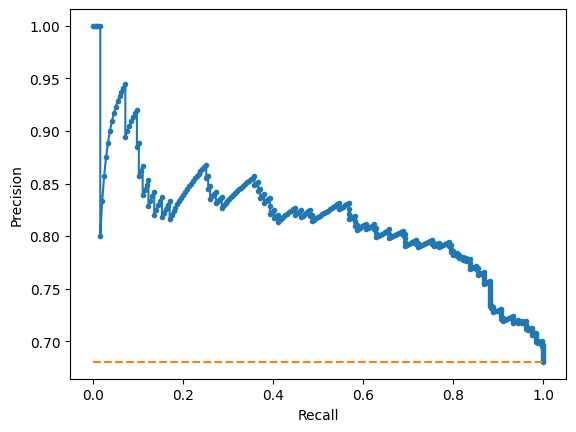

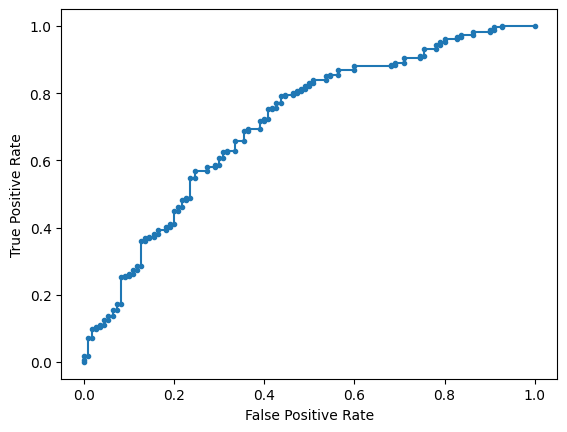

Accuracy: 72.38% Precision: 77.04% Recall: 84.62%
F1: 80.65% MCC: 0.3324
AUPRC: 81.59% AUROC: 70.95%
 accuracy [72.38372093023256]
 precision [77.04280155642024]
 recall [84.61538461538461]
 F1 [80.65173116089613]
 MCC [0.33238833349398095]
 AUPRC [81.59211934300826]
 AUROC [70.95182595182595]

Training # 2 4
2023-04-29 18:16:31.114533
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [0.3977196769389052, -2.129072996901434]
Variances [1.23415542 1.3812388 ]
Priors [0.63978263 0.36021737]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 868:430 66.87%
Computed class weights: {0: 1.5093023255813953, 1: 0.7476958525345622}
Valid 1:0 217:115 65.36%
FIT


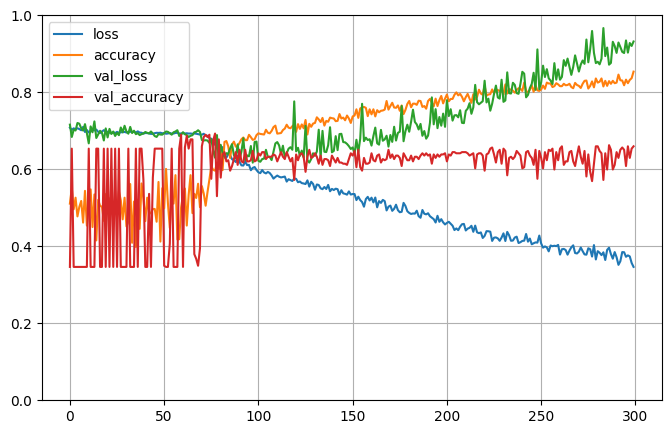


Testing # 2 4
2023-04-29 18:17:55.206684
PREDICT
Test 1:0 217:115 65.36%
Predict 1:0 224:108 67.47%
Test sizes (332, 1025) (332,)
Distrib of scores: 0.64319354 mean 0.34458333 std
Range of scores: 0.0025344386 to 0.9992639
Score threshold 0.5
Confusion matrix
 [[ 55  60]
 [ 53 164]]
Normalized matrix
 [[0.16566265 0.18072289]
 [0.15963855 0.4939759 ]]
Extreme scores correct, pos:neg 142 45
Extreme scores incorrect pos:neg 53 43


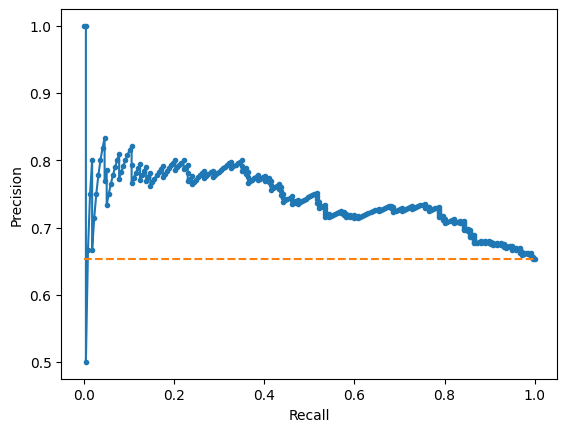

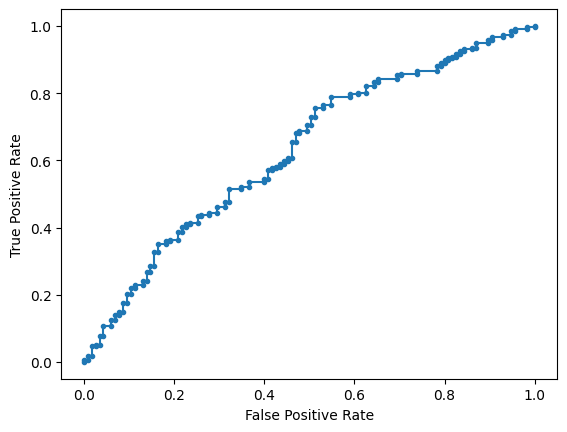

Accuracy: 65.96% Precision: 73.21% Recall: 75.58%
F1: 74.38% MCC: 0.2377
AUPRC: 74.16% AUROC: 63.09%
 accuracy [65.96385542168674]
 precision [73.21428571428571]
 recall [75.57603686635944]
 F1 [74.37641723356008]
 MCC [0.23768302882511208]
 AUPRC [74.15805840494374]
 AUROC [63.089561210178324]

Training # 2 5
2023-04-29 18:17:55.812847
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-2.165523996559738, 0.3778192700275712]
Variances [1.44016071 1.22112323]
Priors [0.35523757 0.64476243]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 876:426 67.28%
Computed class weights: {0: 1.528169014084507, 1: 0.7431506849315068}
Valid 1:0 218:110 66.46%
FIT


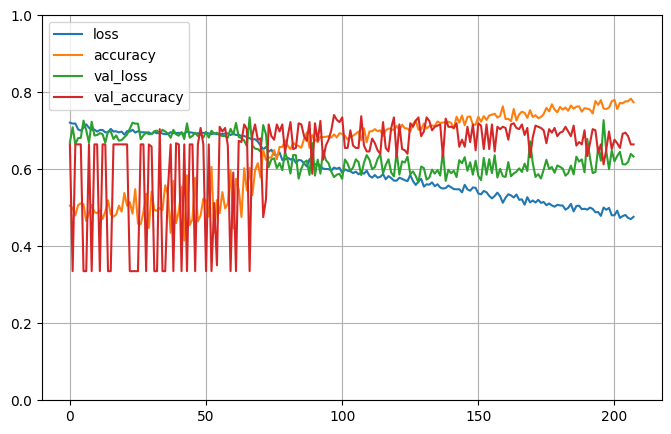


Testing # 2 5
2023-04-29 18:19:19.827696
PREDICT
Test 1:0 218:110 66.46%
Predict 1:0 214:114 65.24%
Test sizes (328, 1025) (328,)
Distrib of scores: 0.559357 mean 0.18451624 std
Range of scores: 0.07920957 to 0.9189039
Score threshold 0.5
Confusion matrix
 [[ 69  41]
 [ 45 173]]
Normalized matrix
 [[0.21036585 0.125     ]
 [0.13719512 0.52743902]]
Extreme scores correct, pos:neg 96 35
Extreme scores incorrect pos:neg 21 16


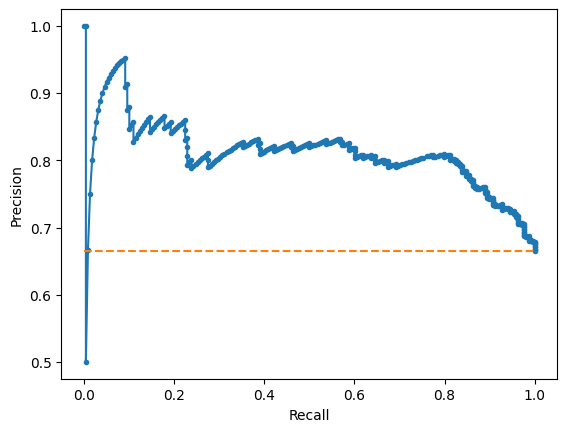

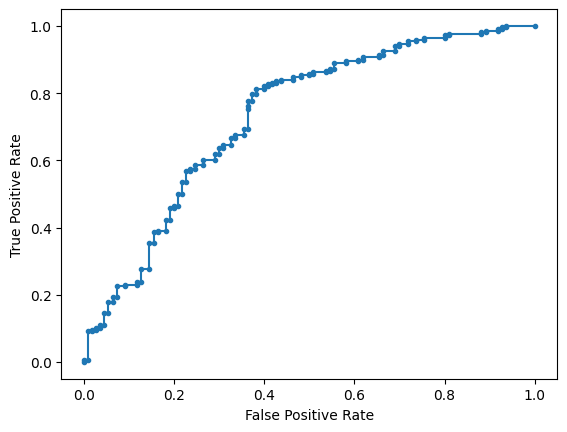

Accuracy: 73.78% Precision: 80.84% Recall: 79.36%
F1: 80.09% MCC: 0.4172
AUPRC: 81.07% AUROC: 73.19%
 accuracy [73.78048780487805]
 precision [80.8411214953271]
 recall [79.35779816513761]
 F1 [80.0925925925926]
 MCC [0.4172471127243638]
 AUPRC [81.07240068259554]
 AUROC [73.18598832360301]
2023-04-29 18:19:20.464653


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 70.72% std 3.80
 precision mean 76.63% std 2.66
 recall mean 80.60% std 5.72
 F1 mean 78.46% std 3.20
 MCC mean 0.3317 std 0.0764
 AUPRC mean 79.60% std 3.42
 AUROC mean 70.26% std 4.62
 accuracy [[73.15634218289085], [63.8235294117647], [68.20987654320987], [70.6081081081081], [71.90332326283988], [70.7936507936508], [76.52733118971061], [72.38372093023256], [65.96385542168674], [73.78048780487805]]
 precision [[76.73469387755102], [77.14285714285715], [71.25], [77.77777777777779], [77.43362831858407], [76.60550458715596], [78.29787234042553], [77.04280155642024], [73.21428571428571], [80.8411214953271]]
 recall [[84.68468468468468], [68.35443037974683], [83.41463414634146], [79.70297029702971], [80.64516129032258], [80.28846153846155], [89.32038834951457], [84.61538461538461], [75.57603686635944], [79.35779816513761]]
 F1 [[80.51391862955032], [72.48322147651007], [76.85393258426967], [78.72860635696823], [79.00677200902935], [78.40375586854461], [83.4467120181406], [8